# Analysis on Startup Dataset

In [1]:
# importing libraries

import numpy as np
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data into dataframe
df = pd.read_csv('/content/startup_funding.csv', encoding='utf-8')

## Exploratory Data Analysis

In [3]:
# displaying first five rows
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
# column names
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [5]:
# concise summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
# number of unique values in each column
df.nunique()

Sr No                3044
Date dd/mm/yyyy      1035
Startup Name         2459
Industry Vertical     821
SubVertical          1942
City  Location        112
Investors Name       2412
InvestmentnType        55
Amount in USD         471
Remarks                72
dtype: int64

In [7]:
# checking for null values
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

There are so many missing values. We have to fill them.

- ## Data Cleaning

In [8]:
#filling null value with "others" for columns other than 'Amount in USD'.
columns=['Industry Vertical','SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType']
df[columns]=df[columns].fillna('others')

In [9]:
# drop Remark column
df.drop('Remarks', axis=1, inplace=True)

In [10]:
df.isnull().sum()

Sr No                  0
Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical      0
SubVertical            0
City  Location         0
Investors Name         0
InvestmentnType        0
Amount in USD        960
dtype: int64

Let us look at 'Amount in USD' column

In [11]:
# some values in the column
df['Amount in USD'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [12]:
df.drop(df.loc[(df['Amount in USD']=='undisclosed') | (df['Amount in USD']=='Undisclosed') | (df['Amount in USD'].isnull()) | (df['Amount in USD']=='unknown')].index,inplace=True)

In [13]:
df.isnull().sum()

Sr No                0
Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
dtype: int64

We have to remove comma and convert the column from pbject type to integer

In [14]:
# defining a function to remove unicodes from each cell of dataframe

def remove(x):
  x=re.sub(r"\\x..","",x)
  x=re.sub(r"\\","",x)
  x=x.lower()
  return x.strip()

# applying function to each cell (avoiding Date column)
for column in df.columns[1:]:
    df[column]=df[column].apply(remove)

In [15]:
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,09/01/2020,byju’s,e-tech,e-learning,bengaluru,tiger global management,private equity round,"20,00,00,000"
1,2,13/01/2020,shuttl,transportation,app based shuttle service,gurgaon,susquehanna growth equity,series c,"80,48,394"
2,3,09/01/2020,mamaearth,e-commerce,retailer of baby and toddler products,bengaluru,sequoia capital india,series b,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,fintech,online investment,new delhi,vinod khatumal,pre-series a,"30,00,000"
4,5,02/01/2020,fashor,fashion and apparel,embroiled clothes for women,mumbai,sprout venture partners,seed round,"18,00,000"
...,...,...,...,...,...,...,...,...,...
3038,3039,28/01/2015,grabhouse.com,others,others,others,"kalaari capital, sequoia capital",private equity,"25,00,000"
3039,3040,29/01/2015,printvenue,others,others,others,asia pacific internet group,private equity,"45,00,000"
3040,3041,29/01/2015,graphene,others,others,others,karsemven fund,private equity,"8,25,000"
3041,3042,30/01/2015,mad street den,others,others,others,"exfinity fund, growx ventures.",private equity,"15,00,000"


In [16]:
# removing comma from values
df['Amount in USD']=df['Amount in USD'].apply(lambda x: str(x).replace("+",""))
df['Amount in USD']=df['Amount in USD'].apply(lambda x: str(x).replace(",",""))
df['Amount in USD']=df['Amount in USD'].apply(lambda x: str(x).replace(r"n/a","other"))

In [17]:
# removing 'other' from the 'Amount in USD' column
df=df[df['Amount in USD']!='other']
# changing datatype to float
df['Amount in USD']=df['Amount in USD'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sr No              2073 non-null   int64  
 1   Date dd/mm/yyyy    2073 non-null   object 
 2   Startup Name       2073 non-null   object 
 3   Industry Vertical  2073 non-null   object 
 4   SubVertical        2073 non-null   object 
 5   City  Location     2073 non-null   object 
 6   Investors Name     2073 non-null   object 
 7   InvestmentnType    2073 non-null   object 
 8   Amount in USD      2073 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 162.0+ KB


Now, looking at the **Date dd/mm/yyyy** column

In [19]:
df['Date dd/mm/yyyy'].unique()

array(['09/01/2020', '13/01/2020', '02/01/2020', '10/01/2020',
       '12/12/2019', '06/12/2019', '03/12/2019', '13/12/2019',
       '17/12/2019', '16/12/2019', '14/12/2019', '11/12/2019',
       '20/12/2019', '13/11/2019', '14/11/2019', '18/11/2019',
       '15/11/2019', '20/11/2019', '12/11/2019', '11/11/2019',
       '19/11/2019', '25/11/2019', '04/10/2019', '02/10/2019',
       '05/09/2019', '04/09/2019', '03/09/2019', '01/08/2019',
       '12/08/2019', '13/08/2019', '23/08/2019', '22/08/2019',
       '21/08/2019', '19/08/2019', '27/08/2019', '02/07/2019',
       '01/07/2019', '03/07/2019', '04/07/2019', '10/07/2019',
       '11/07/2019', '09/07/2019', '08/07/2019', '05/06/2019',
       '04/06/2019', '03/06/2019', '06/06/2019', '10/06/2019',
       '08/06/2019', '06/05/2019', '01/05/2019', '02/05/2019',
       '28/05/2019', '30/05/2019', '31/05/2019', '16/04/2019',
       '12/04/2019', '10/04/2019', '13/04/2019', '11/04/2019',
       '19/04/2019', '17/04/2019', '08/02/2019', '13/02

In [20]:
# replacing '.' with '/' 
df['Date dd/mm/yyyy']=df['Date dd/mm/yyyy'].apply(lambda x: x.replace(".","/"))

# replacing dates which were not in  the correct format
df['Date dd/mm/yyyy'].replace('22/01//2015','22/01/2015',inplace=True)
df['Date dd/mm/yyyy'].replace('01/07/015','01/07/2015',inplace=True)
df['Date dd/mm/yyyy'].replace('05/072018','05/07/2018',inplace=True)

In [21]:
# converting to datetime format
df['Date dd/mm/yyyy']=pd.to_datetime(df['Date dd/mm/yyyy'], infer_datetime_format=True)

Lets examine the **City  Location** column

In [22]:
df['City  Location'].unique()

array(['bengaluru', 'gurgaon', 'new delhi', 'mumbai', 'chennai', 'pune',
       'noida', 'faridabad', 'san francisco', 'san jose,', 'amritsar',
       'delhi', 'kormangala', 'tulangan', 'hyderabad', 'burnsville',
       'menlo park', 'gurugram', 'palo alto', 'santa monica', 'singapore',
       'taramani', 'andheri', 'chembur', 'nairobi', 'haryana', 'new york',
       'karnataka', 'mumbai/bengaluru', 'bhopal',
       'bengaluru and gurugram', 'india/singapore', 'jaipur', 'india/us',
       'nagpur', 'indore', 'new york, bengaluru', 'california', 'india',
       'ahemadabad', 'rourkela', 'bhubneswar', 'chandigarh',
       'delhi & cambridge', 'kolkata', 'coimbatore', 'bangalore',
       'udaipur', 'ahmedabad', 'surat', 'goa', 'gaya', 'vadodara',
       'missourie', 'panaji', 'gwalior', 'bangalore/ bangkok', 'kerala',
       'others', 'lucknow', 'trivandrum', 'sfo / bangalore',
       'pune/seattle', 'pune / dubai', 'bangalore / sfo', 'varanasi',
       'new delhi / us', 'mumbai / uk', 'k

Some locations have 2 names.

In [23]:
# getting the city name where 2 names are available
df['City  Location']=df['City  Location'].apply(lambda x: x.split("/")[0].strip())

In [24]:
## defining afunction to change common city names
def city_map(x):
    if x=='gurugram':
        return 'gurgaon'
    elif x=='bengaluru':
        return 'bangalore'
    else:
        return x
df['City  Location']=df['City  Location'].apply(city_map)

Looking at the **InvestmentnType** column

In [25]:
df['InvestmentnType'].unique()

array(['private equity round', 'series c', 'series b', 'pre-series a',
       'seed round', 'series a', 'series d', 'seed', 'series f',
       'series e', 'debt funding', 'series g', 'series h', 'seed funding',
       'others', 'funding round', 'maiden round', 'seed funding round',
       'single venture', 'corporate round', 'venture round', 'angel',
       'series j', 'angel round', 'venture - series unknown',
       'private equity', 'debt and preference capital', 'inhouse funding',
       'seed/ angel funding', 'debt', 'equity', 'debt-funding',
       'mezzanine', 'series b (extension)', 'equity based funding',
       'private funding', 'seed / angel funding', 'seed/angel funding',
       'seed / angle funding', 'private', 'angel / seed funding',
       'structured debt', 'term loan', 'privateequity', 'seednfunding',
       'privatenequity', 'crowd funding'], dtype=object)

The angel and seed Funding are same type of funding, we can remove the term seed from it.

In [26]:
# getting angel type of funding 
df['InvestmentnType']=df['InvestmentnType'].apply(lambda x: x.split("/")[-1])

## Visualizations

- ### Top 10 funded Startups

In [30]:
#list
top10startup=[]

for startup in df['Startup Name'].unique():
    # new dataframe for each startup
    df1=df[df['Startup Name']==startup]    
    # total sum of funding in startup
    sum=np.sum(df1['Amount in USD'])        
    top10startup.append([startup,sum])

In [31]:
# new dataframe
startup=pd.DataFrame(top10startup,columns=['startup','Revenue']) 
# sort by amount
startup.sort_values(by='Revenue',ascending=False,inplace=True)
startup.head()

,startup,Revenue
470,flipkart,4.059700e+09
55,rapido bike taxi,3.900000e+09
29,paytm,3.148950e+09
519,ola,9.845000e+08
31,udaan,8.700000e+08


In [32]:
# converting amount to million
startup['Revenue']=startup['Revenue']/1000000

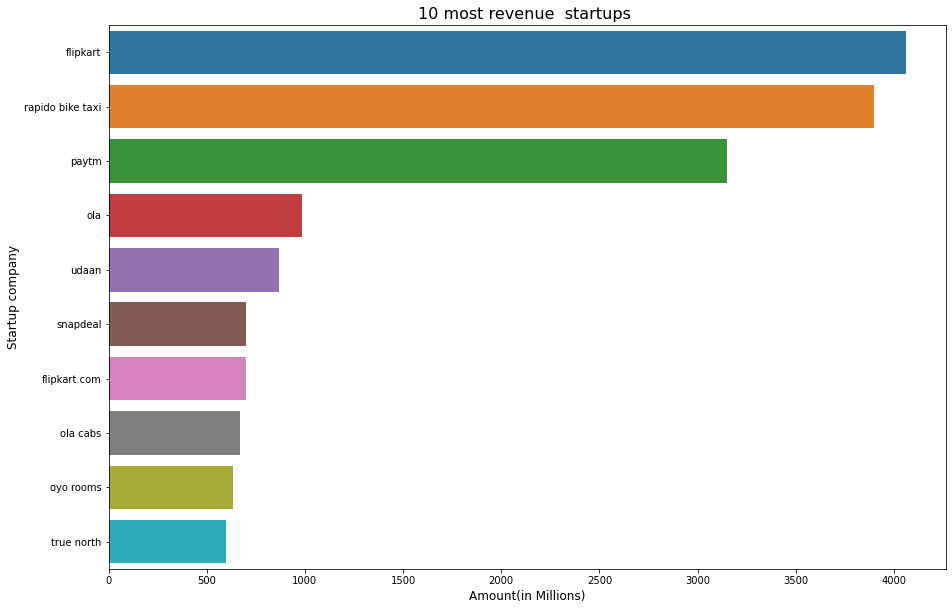

In [37]:
## visualising the amount spend on the top 10 startups

plt.figure(figsize=(15,10))
sns.barplot(x="Revenue",
            y="startup",
            data=startup[:10]
            )

plt.title("10 most revenue  startups ",fontsize=16)
plt.xlabel('Amount(in Millions)', fontsize = 12)
plt.ylabel('Startup company', fontsize = 12)
plt.show()
#del startup

- ### Important Investors

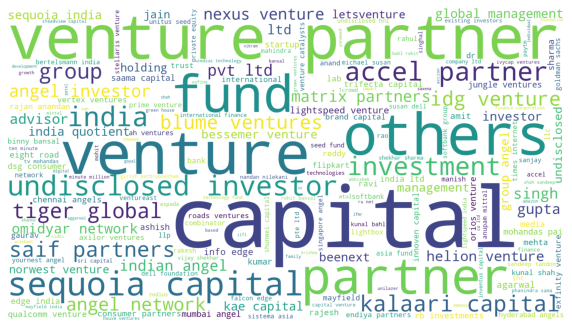

In [41]:
from wordcloud import WordCloud

names = df[df['Investors Name']!='others']["Investors Name"]
# word cloud for investor names
wc = WordCloud(width=1920, height=1080, background_color='white').generate(' '.join(names))
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

- ### City Location of Startups

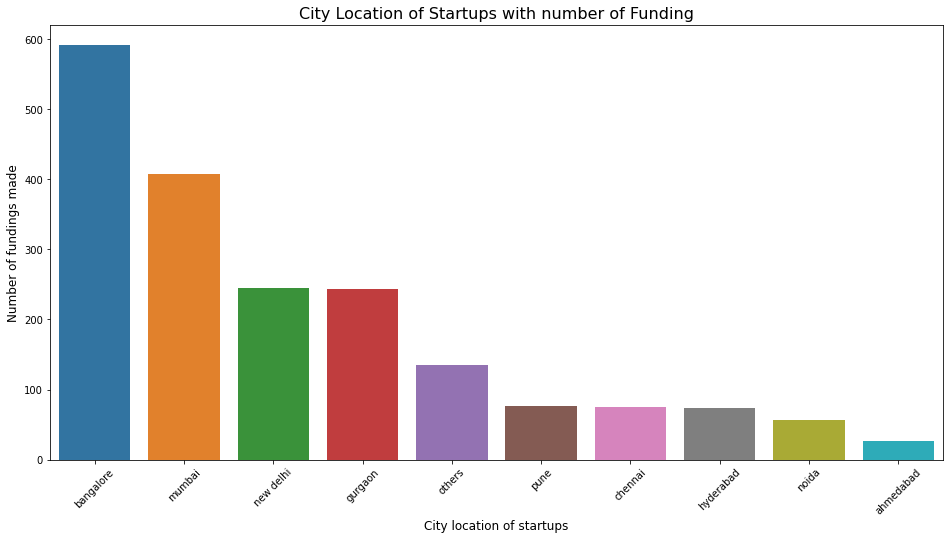

In [44]:
city = df['City  Location'].value_counts().head(10)
plt.figure(figsize=(16,8))
sns.barplot(city.index, city.values)
plt.xticks(rotation=45)
plt.xlabel('City location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("City Location of Startups with number of Funding", fontsize=16)
plt.show()

- ### Famous Industries of Startup

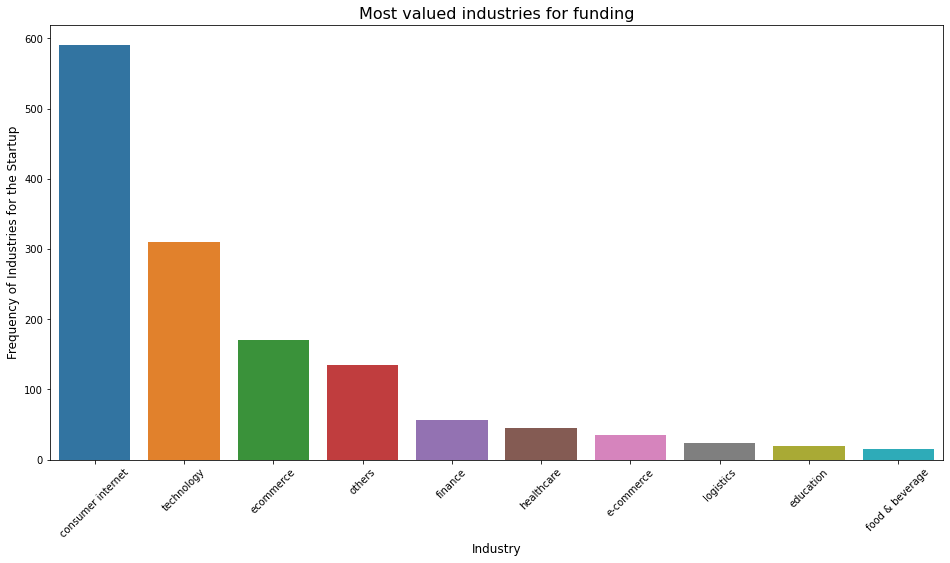

In [45]:
industry = df['Industry Vertical'].value_counts().head(10)
plt.figure(figsize=(16,8))
sns.barplot(industry.index, industry.values)
plt.xticks(rotation=45)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Frequency of Industries for the Startup', fontsize=12)
plt.title("Most valued industries for funding", fontsize=16)
plt.show()

### Insights

1. Flipkart is the most revenued startup
2. Startups in Banglore have more number of funding
3. Consumer internet is the most valued industry for funding

**Thank You**